In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
def fill_nulls_by_group_median(df, label_col, target_cols):
    for col in target_cols:
        if df[col].isnull().any():  # Verificar si hay valores nulos
            # Calcular la mediana de la columna por grupos de label
            medians = df.groupby(label_col)[col].median()

            # Determinar el grupo predominante
            predominant_group = df[label_col][df[col].notnull()].mode()[0]

            # Sustituir los valores nulos por la mediana del grupo predominante
            df[col] = df.apply(
                lambda row: medians[predominant_group] if pd.isnull(row[col]) else row[col],
                axis=1
            )
    return df

In [25]:
df = pd.read_csv("dataset_base.csv")

In [26]:
df

,Age,Sex,Race,Omega_Score,AFP,Angiopoietin-2,AXL,CA-125,CA 15-3,CA19-9,...,sEGFR,sFas,SHBG,sHER2/sEGFR2/sErbB2,sPECAM-1,TGFa,Thrombospondin-2,TIMP-1,TIMP-2,Tumor type
0,60.0,Male,Caucasian,2.96,1583.450,5598.50,3621.04,5.090,19.08,16.452,...,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,Colorectum
1,59.0,Female,Caucasian,2.45,715.308,20936.35,2772.96,7.270,10.04,40.910,...,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,Colorectum
2,69.0,Female,Caucasian,1.22,4365.530,2350.93,4120.77,4.854,16.96,16.452,...,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,Colorectum
3,70.0,Female,Caucasian,1.64,715.308,1604.34,2029.96,5.390,8.31,16.452,...,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,Colorectum
4,43.0,Female,Caucasian,1.33,801.300,2087.57,2069.17,4.854,11.73,16.452,...,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,Colorectum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,55.0,Female,Caucasian,0.98,879.498,1484.70,2096.76,24.820,10.30,42.390,...,2542.26,207.240,115.24,5390.31,8538.58,16.890,599.40,167799.61,50128.60,Ovary
1813,57.0,Female,Caucasian,3.92,1337.330,1607.90,852.37,5.580,9.80,16.440,...,1670.22,207.240,147.17,7951.03,12966.19,16.890,599.40,123443.76,54066.98,Ovary
1814,60.0,Female,Caucasian,7.96,879.498,1592.84,1044.45,30.480,8.48,16.440,...,1194.03,207.240,104.63,2396.36,1901.41,16.890,599.40,104070.89,39844.02,Ovary
1815,49.0,Female,Caucasian,0.81,879.498,5267.95,1445.69,1469.450,23.74,62.260,...,1607.16,207.240,73.55,3079.81,5312.90,16.890,6864.33,110579.24,42921.13,Ovary


In [27]:
df["Label"] = df["Tumor type"].apply(lambda x: "Normal" if x == "Normal" else "Cancer")
df = df.drop(columns = "Tumor type")

Now, all types of cancer are classified under a single category as 'Cancer'.

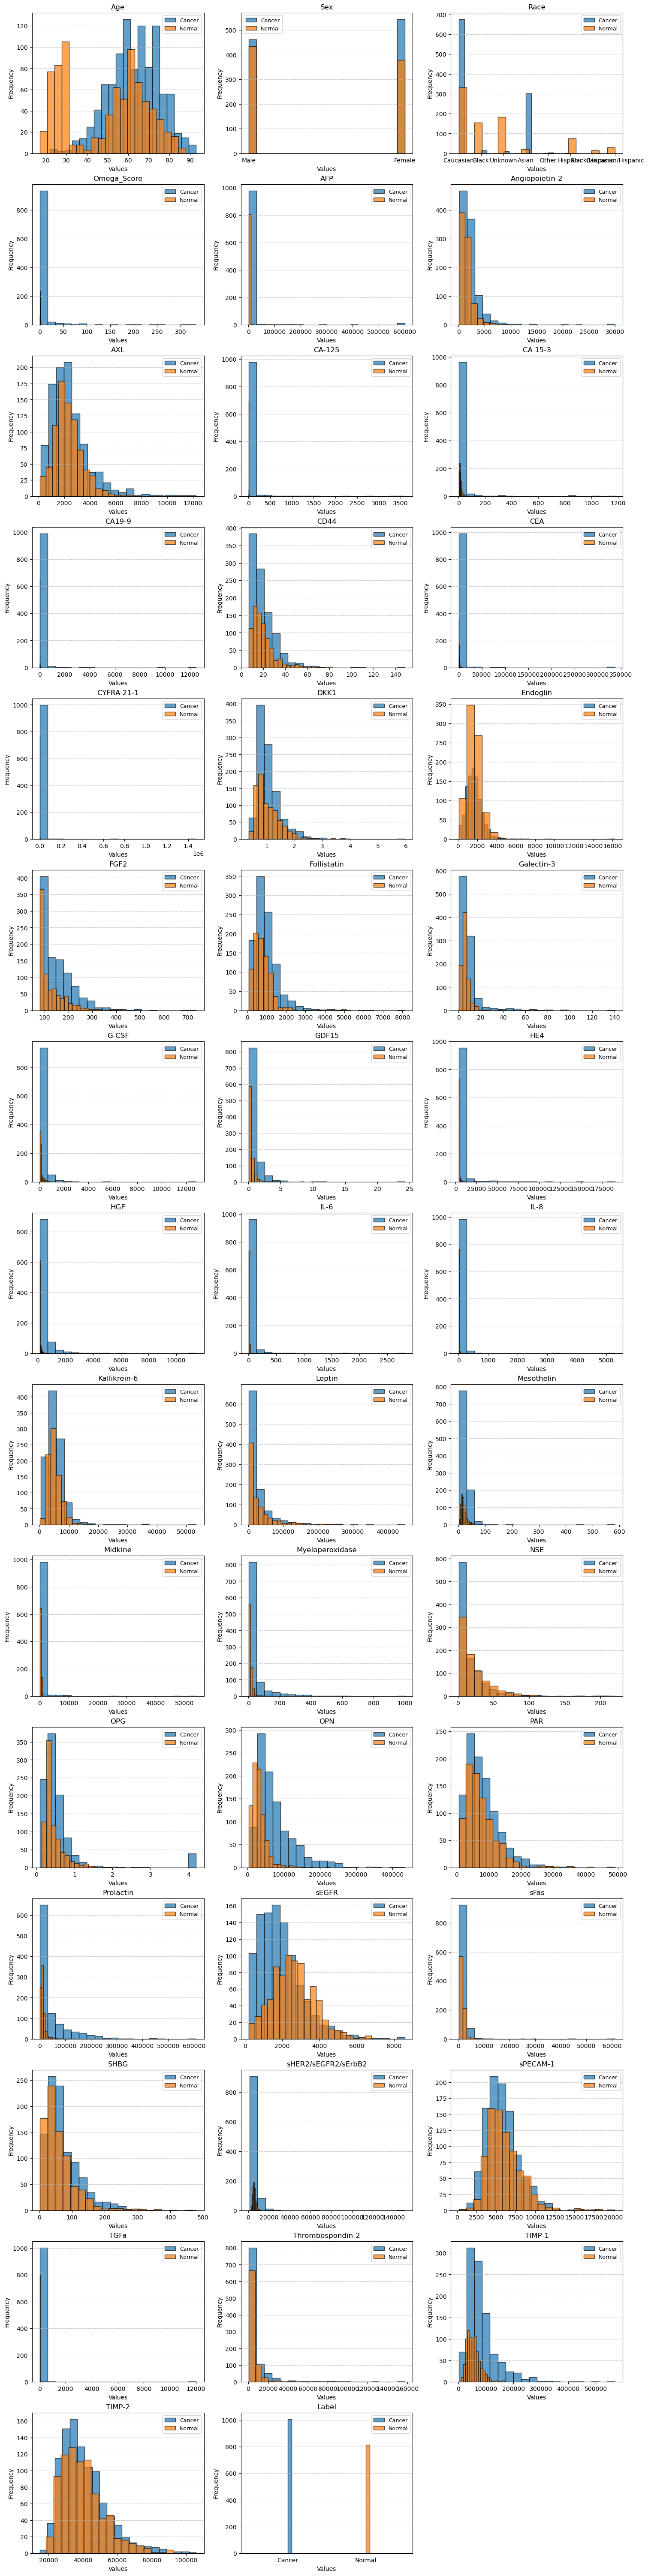

In [28]:
# Crear un grid de histogramas para todas las columnas numéricas
columnas = df.columns
n_columnas = 3  # Número de columnas del grid (ajustable)
n_filas = -(-len(columnas) // n_columnas)  # Calcular filas (redondeo hacia arriba)

# Configuración del grid
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(15, n_filas * 4), constrained_layout=True)
axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

# Definir colores para cada grupo en "Tumor"
grupos_tumor = df["Label"].unique()  # Obtener valores únicos
colores = plt.cm.tab10(range(len(grupos_tumor)))

# Crear un histograma para cada característica
for i, columna in enumerate(columnas):
    ax = axes[i]
    for j, grupo in enumerate(grupos_tumor):
        datos_grupo = df[df["Label"] == grupo][columna].dropna()
        ax.hist(datos_grupo, bins=20, color=colores[j], edgecolor='black', alpha=0.7, label=f'{grupo}')
    ax.set_title(f'{columna}', fontsize=12)
    ax.set_xlabel('Values', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(fontsize=9)  # Añadir leyenda para diferenciar colores

# Ocultar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Mostrar los histogramas
plt.savefig("initial-histograms.png", format="png", dpi=300)

plt.show()

In [29]:
df.isnull().sum()

Age                     0
Sex                     0
Race                    0
Omega_Score            66
AFP                     0
Angiopoietin-2          0
AXL                     6
CA-125                  0
CA 15-3                 0
CA19-9                  0
CD44                    6
CEA                     0
CYFRA 21-1              0
DKK1                    0
Endoglin                0
FGF2                    0
Follistatin             0
Galectin-3              0
G-CSF                   7
GDF15                   0
HE4                     0
HGF                     0
IL-6                    0
IL-8                    0
Kallikrein-6            6
Leptin                  0
Mesothelin              6
Midkine                 6
Myeloperoxidase         0
NSE                     0
OPG                     0
OPN                     0
PAR                     6
Prolactin               0
sEGFR                   6
sFas                    1
SHBG                    0
sHER2/sEGFR2/sErbB2     6
sPECAM-1    

<Figure size 1400x600 with 0 Axes>

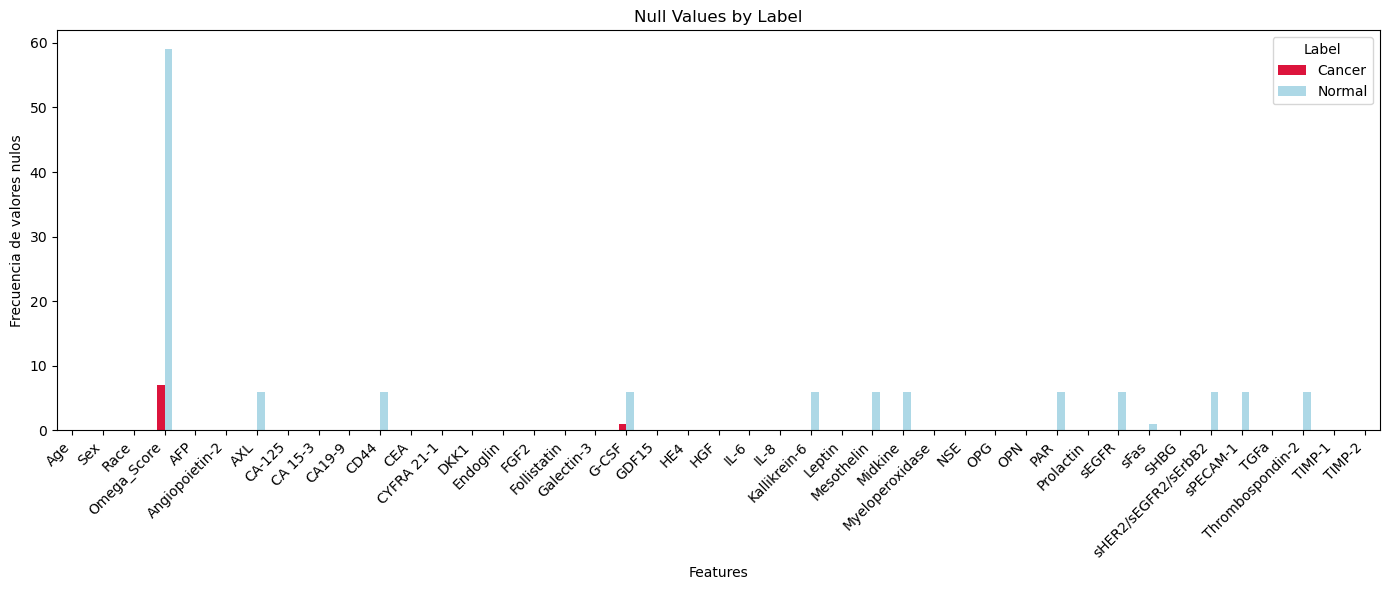

In [30]:
labels = df["Label"].unique() 
features = df.columns.drop("Label") 
null_counts = {label: df[df["Label"] == label][features].isnull().sum() 
               for label in labels} 

null_df = pd.DataFrame(null_counts) 

plt.figure(figsize=(14,6)) 
null_df.plot(kind="bar", figsize=(14,6), color=["crimson", "lightblue"]) 
plt.title("Null Values by Label") 
plt.xlabel("Features") 
plt.ylabel("Frecuencia de valores nulos") 
plt.xticks(rotation=45, ha="right") 
plt.legend(title="Label") 
plt.tight_layout() 
plt.show()

In [31]:
null_values_columns = [col for col in df.columns if df[col].isnull().any()]

df_filled = fill_nulls_by_group_median(df, 'Label', df[null_values_columns])

In [32]:
df_filled.isnull().sum()

Age                    0
Sex                    0
Race                   0
Omega_Score            0
AFP                    0
Angiopoietin-2         0
AXL                    0
CA-125                 0
CA 15-3                0
CA19-9                 0
CD44                   0
CEA                    0
CYFRA 21-1             0
DKK1                   0
Endoglin               0
FGF2                   0
Follistatin            0
Galectin-3             0
G-CSF                  0
GDF15                  0
HE4                    0
HGF                    0
IL-6                   0
IL-8                   0
Kallikrein-6           0
Leptin                 0
Mesothelin             0
Midkine                0
Myeloperoxidase        0
NSE                    0
OPG                    0
OPN                    0
PAR                    0
Prolactin              0
sEGFR                  0
sFas                   0
SHBG                   0
sHER2/sEGFR2/sErbB2    0
sPECAM-1               0
TGFa                   0


In [33]:
df_filled['Race'] = df['Race'].apply(lambda x: "Other" if x == 'Caucasian/Hispanic' or x == 'Black/Hispanic' else x)

In [34]:
df_filled

,Age,Sex,Race,Omega_Score,AFP,Angiopoietin-2,AXL,CA-125,CA 15-3,CA19-9,...,sEGFR,sFas,SHBG,sHER2/sEGFR2/sErbB2,sPECAM-1,TGFa,Thrombospondin-2,TIMP-1,TIMP-2,Label
0,60.0,Male,Caucasian,2.96,1583.450,5598.50,3621.04,5.090,19.08,16.452,...,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,Cancer
1,59.0,Female,Caucasian,2.45,715.308,20936.35,2772.96,7.270,10.04,40.910,...,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,Cancer
2,69.0,Female,Caucasian,1.22,4365.530,2350.93,4120.77,4.854,16.96,16.452,...,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,Cancer
3,70.0,Female,Caucasian,1.64,715.308,1604.34,2029.96,5.390,8.31,16.452,...,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,Cancer
4,43.0,Female,Caucasian,1.33,801.300,2087.57,2069.17,4.854,11.73,16.452,...,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,55.0,Female,Caucasian,0.98,879.498,1484.70,2096.76,24.820,10.30,42.390,...,2542.26,207.240,115.24,5390.31,8538.58,16.890,599.40,167799.61,50128.60,Cancer
1813,57.0,Female,Caucasian,3.92,1337.330,1607.90,852.37,5.580,9.80,16.440,...,1670.22,207.240,147.17,7951.03,12966.19,16.890,599.40,123443.76,54066.98,Cancer
1814,60.0,Female,Caucasian,7.96,879.498,1592.84,1044.45,30.480,8.48,16.440,...,1194.03,207.240,104.63,2396.36,1901.41,16.890,599.40,104070.89,39844.02,Cancer
1815,49.0,Female,Caucasian,0.81,879.498,5267.95,1445.69,1469.450,23.74,62.260,...,1607.16,207.240,73.55,3079.81,5312.90,16.890,6864.33,110579.24,42921.13,Cancer


In [35]:
df["Race"].value_counts()

Race
Caucasian    1007
Asian         323
Unknown       193
Black         168
Hispanic       77
Other          49
Name: count, dtype: int64

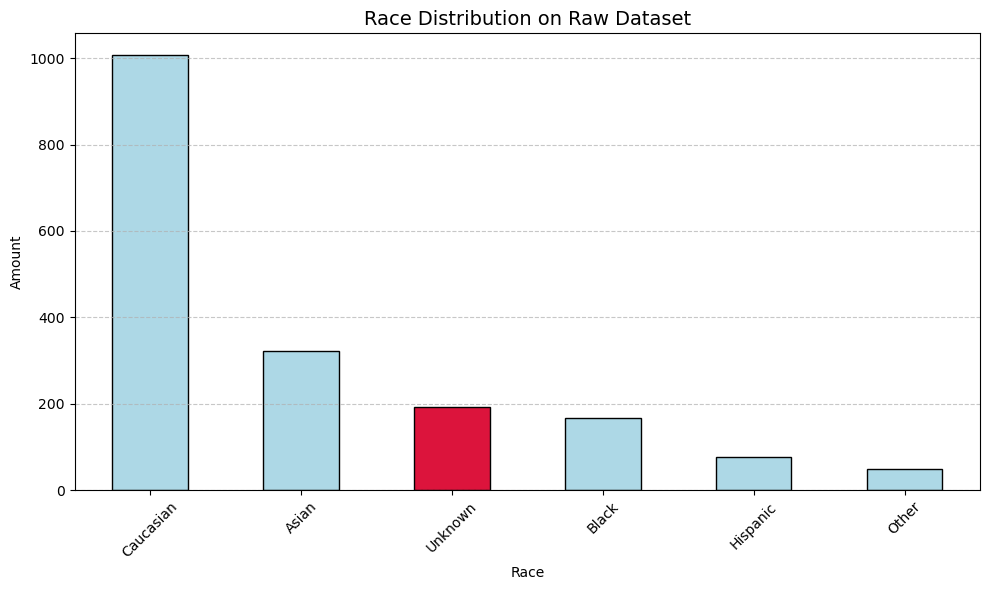

<Figure size 640x480 with 0 Axes>

In [36]:
race_count = df_filled["Race"].value_counts()
colores = ['crimson' if idx == 'Unknown' else 'lightblue' for idx in race_count.index]

plt.figure(figsize=(10, 6))
race_count.plot(kind='bar', color=colores, edgecolor='black')

# Añadir etiquetas y título
plt.title('Race Distribution on Raw Dataset', fontsize=14)
plt.ylabel('Amount' , fontsize = 10)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

plt.savefig("initial-race-distribution.png", format="png", dpi=300)

In [37]:
df_filled[df_filled['Race'] == 'Unknown']

,Age,Sex,Race,Omega_Score,AFP,Angiopoietin-2,AXL,CA-125,CA 15-3,CA19-9,...,sEGFR,sFas,SHBG,sHER2/sEGFR2/sErbB2,sPECAM-1,TGFa,Thrombospondin-2,TIMP-1,TIMP-2,Label
94,71.0,Female,Unknown,0.46,2331.680,4544.00,2494.13,4.770,11.08,15.798,...,1753.22,202.158,57.33,7854.70,4476.64,16.104,3155.420,80793.43,43357.07,Cancer
319,72.0,Female,Unknown,0.57,929.640,1825.88,2358.21,4.896,18.52,16.422,...,904.67,978.950,56.55,7280.87,7531.26,16.488,1442.140,41182.39,37839.69,Cancer
408,59.0,Male,Unknown,1.01,833.736,800.55,2757.32,4.890,13.15,16.464,...,5268.70,206.094,25.05,11201.59,8185.06,16.356,577.350,61797.20,46298.94,Cancer
425,66.0,Male,Unknown,1.62,594419.862,4430.32,1740.91,5.450,50.39,19.710,...,2023.03,3153.030,36.54,5406.65,7520.92,86.380,24668.880,154769.56,50778.70,Cancer
426,77.0,Male,Unknown,2.68,999.432,1700.76,3719.06,4.944,39.57,16.686,...,1536.36,195.330,42.81,5176.42,8295.34,17.088,7159.080,100506.51,38560.80,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,38.0,Male,Unknown,0.46,740.016,1112.37,1606.96,4.608,21.21,15.912,...,1823.73,623.750,14.60,3449.88,3141.06,15.258,835.000,59579.84,40979.86,Normal
1701,52.0,Female,Unknown,0.33,740.016,583.62,1708.47,4.608,15.13,15.912,...,2334.46,1142.230,28.83,3948.14,4318.48,15.258,835.000,67033.91,40559.19,Normal
1702,34.0,Female,Unknown,0.67,740.016,312.88,685.72,4.608,8.57,15.912,...,3263.91,192.948,109.81,4297.89,4252.15,15.258,835.000,63771.21,37055.26,Normal
1738,72.0,Male,Unknown,0.45,1024.760,1170.81,3496.00,6.240,21.11,214.540,...,2394.78,2198.700,97.75,6935.42,8490.80,16.554,17227.030,137336.29,64755.66,Cancer


In [38]:
known_races = df_filled[df_filled["Race"] != "Unknown"]["Race"].value_counts().to_dict() # desconsiderando los propios valores no conocidos.

known_total = sum(known_races.values())
probabilities = {k: v / known_total for k, v in known_races.items()}

# Crear una lista ponderada para reemplazar
categories = list(probabilities.keys())
weights = list(probabilities.values())

np.random.seed(42)
# Reemplazar "Unknown" con muestreo aleatorio según la distribución
df_filled['Race'] = df_filled['Race'].apply(lambda x: np.random.choice(categories, p=weights) if x == 'Unknown' else x)

In [39]:
selected_rows = df_filled.iloc[[94, 319, 408, 425, 426, 1700, 1701, 1702, 1738, 1739]] # testeando si cambian los valores al aplicar la funcion random.
selected_rows

,Age,Sex,Race,Omega_Score,AFP,Angiopoietin-2,AXL,CA-125,CA 15-3,CA19-9,...,sEGFR,sFas,SHBG,sHER2/sEGFR2/sErbB2,sPECAM-1,TGFa,Thrombospondin-2,TIMP-1,TIMP-2,Label
94,71.0,Female,Caucasian,0.46,2331.680,4544.00,2494.13,4.770,11.08,15.798,...,1753.22,202.158,57.33,7854.70,4476.64,16.104,3155.420,80793.43,43357.07,Cancer
319,72.0,Female,Hispanic,0.57,929.640,1825.88,2358.21,4.896,18.52,16.422,...,904.67,978.950,56.55,7280.87,7531.26,16.488,1442.140,41182.39,37839.69,Cancer
408,59.0,Male,Asian,1.01,833.736,800.55,2757.32,4.890,13.15,16.464,...,5268.70,206.094,25.05,11201.59,8185.06,16.356,577.350,61797.20,46298.94,Cancer
425,66.0,Male,Caucasian,1.62,594419.862,4430.32,1740.91,5.450,50.39,19.710,...,2023.03,3153.030,36.54,5406.65,7520.92,86.380,24668.880,154769.56,50778.70,Cancer
426,77.0,Male,Caucasian,2.68,999.432,1700.76,3719.06,4.944,39.57,16.686,...,1536.36,195.330,42.81,5176.42,8295.34,17.088,7159.080,100506.51,38560.80,Cancer
1700,38.0,Male,Caucasian,0.46,740.016,1112.37,1606.96,4.608,21.21,15.912,...,1823.73,623.750,14.60,3449.88,3141.06,15.258,835.000,59579.84,40979.86,Normal
1701,52.0,Female,Caucasian,0.33,740.016,583.62,1708.47,4.608,15.13,15.912,...,2334.46,1142.230,28.83,3948.14,4318.48,15.258,835.000,67033.91,40559.19,Normal
1702,34.0,Female,Caucasian,0.67,740.016,312.88,685.72,4.608,8.57,15.912,...,3263.91,192.948,109.81,4297.89,4252.15,15.258,835.000,63771.21,37055.26,Normal
1738,72.0,Male,Black,0.45,1024.760,1170.81,3496.00,6.240,21.11,214.540,...,2394.78,2198.700,97.75,6935.42,8490.80,16.554,17227.030,137336.29,64755.66,Cancer
1739,54.0,Male,Black,0.57,3041.930,456.21,728.85,5.790,71.94,29.080,...,5133.83,2334.260,59.70,14073.44,9234.17,16.554,5584.935,97883.95,93722.51,Cancer


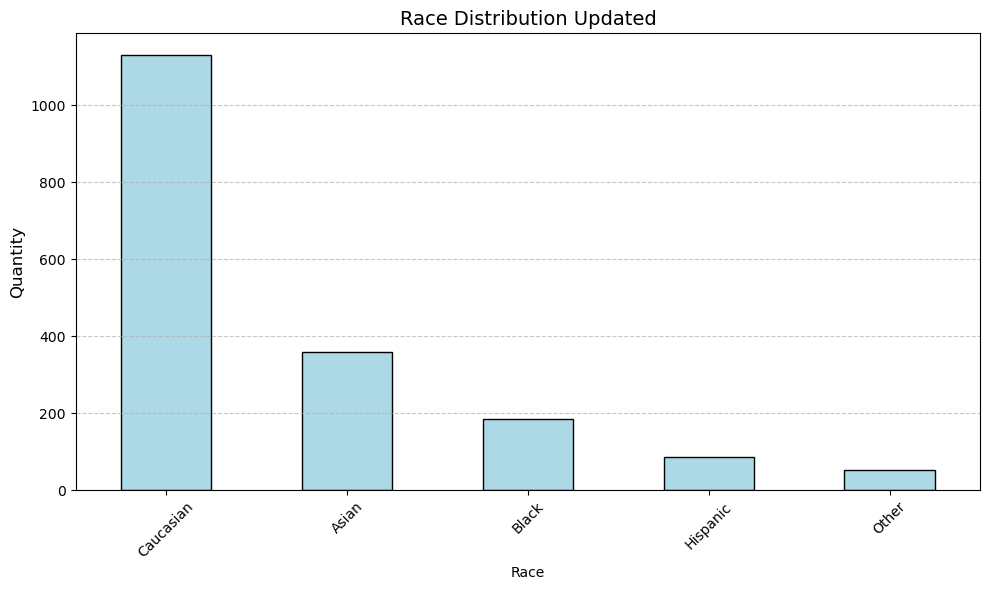

In [40]:
race_count = df_filled["Race"].value_counts() #variable actualizada
colores = ['crimson' if idx == 'Unknown' else 'lightblue' for idx in race_count.index]

plt.figure(figsize=(10, 6))
race_count.plot(kind='bar', color=colores, edgecolor='black')

# Añadir etiquetas y título
plt.ylabel('Quantity', fontsize=12)
plt.title('Race Distribution Updated', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.savefig("race-distribution-updated.png", format="png", dpi=300)

plt.show()

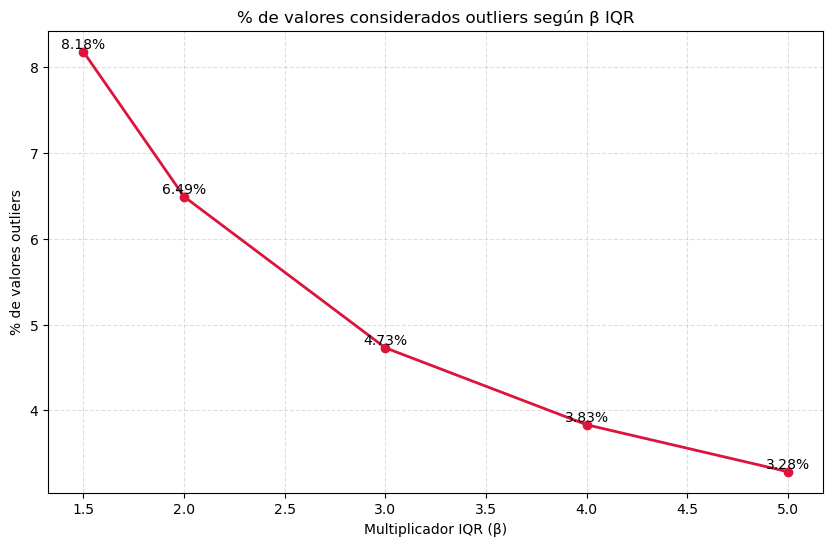

In [41]:
dataframe = df_filled.copy() 
numeric_data = dataframe.select_dtypes(include=[np.number])
betas = [1.5, 2, 3, 4, 5]

def outlier_percentage(table, beta):
    Q1 = table.quantile(0.25)
    Q3 = table.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - beta * IQR
    upper = Q3 + beta * IQR
    mask = (table < lower) | (table > upper)
    total_values = table.size
    outliers = mask.sum().sum()
    return (outliers / total_values) * 100

percentages = [outlier_percentage(numeric_data, b) for b in betas]

plt.figure(figsize=(10,6))
plt.plot(betas, percentages, marker='o', color='crimson', linewidth=2)
plt.title("% de valores considerados outliers según β IQR")
plt.xlabel("Multiplicador IQR (β)")
plt.ylabel("% de valores outliers")
plt.grid(True, linestyle="--", alpha=0.4)

for b, p in zip(betas, percentages):
    plt.text(b, p, f"{p:.2f}%", ha='center', va='bottom')

plt.savefig("outliers_IQR_multipliers.png", format="png", dpi=300)
plt.show()


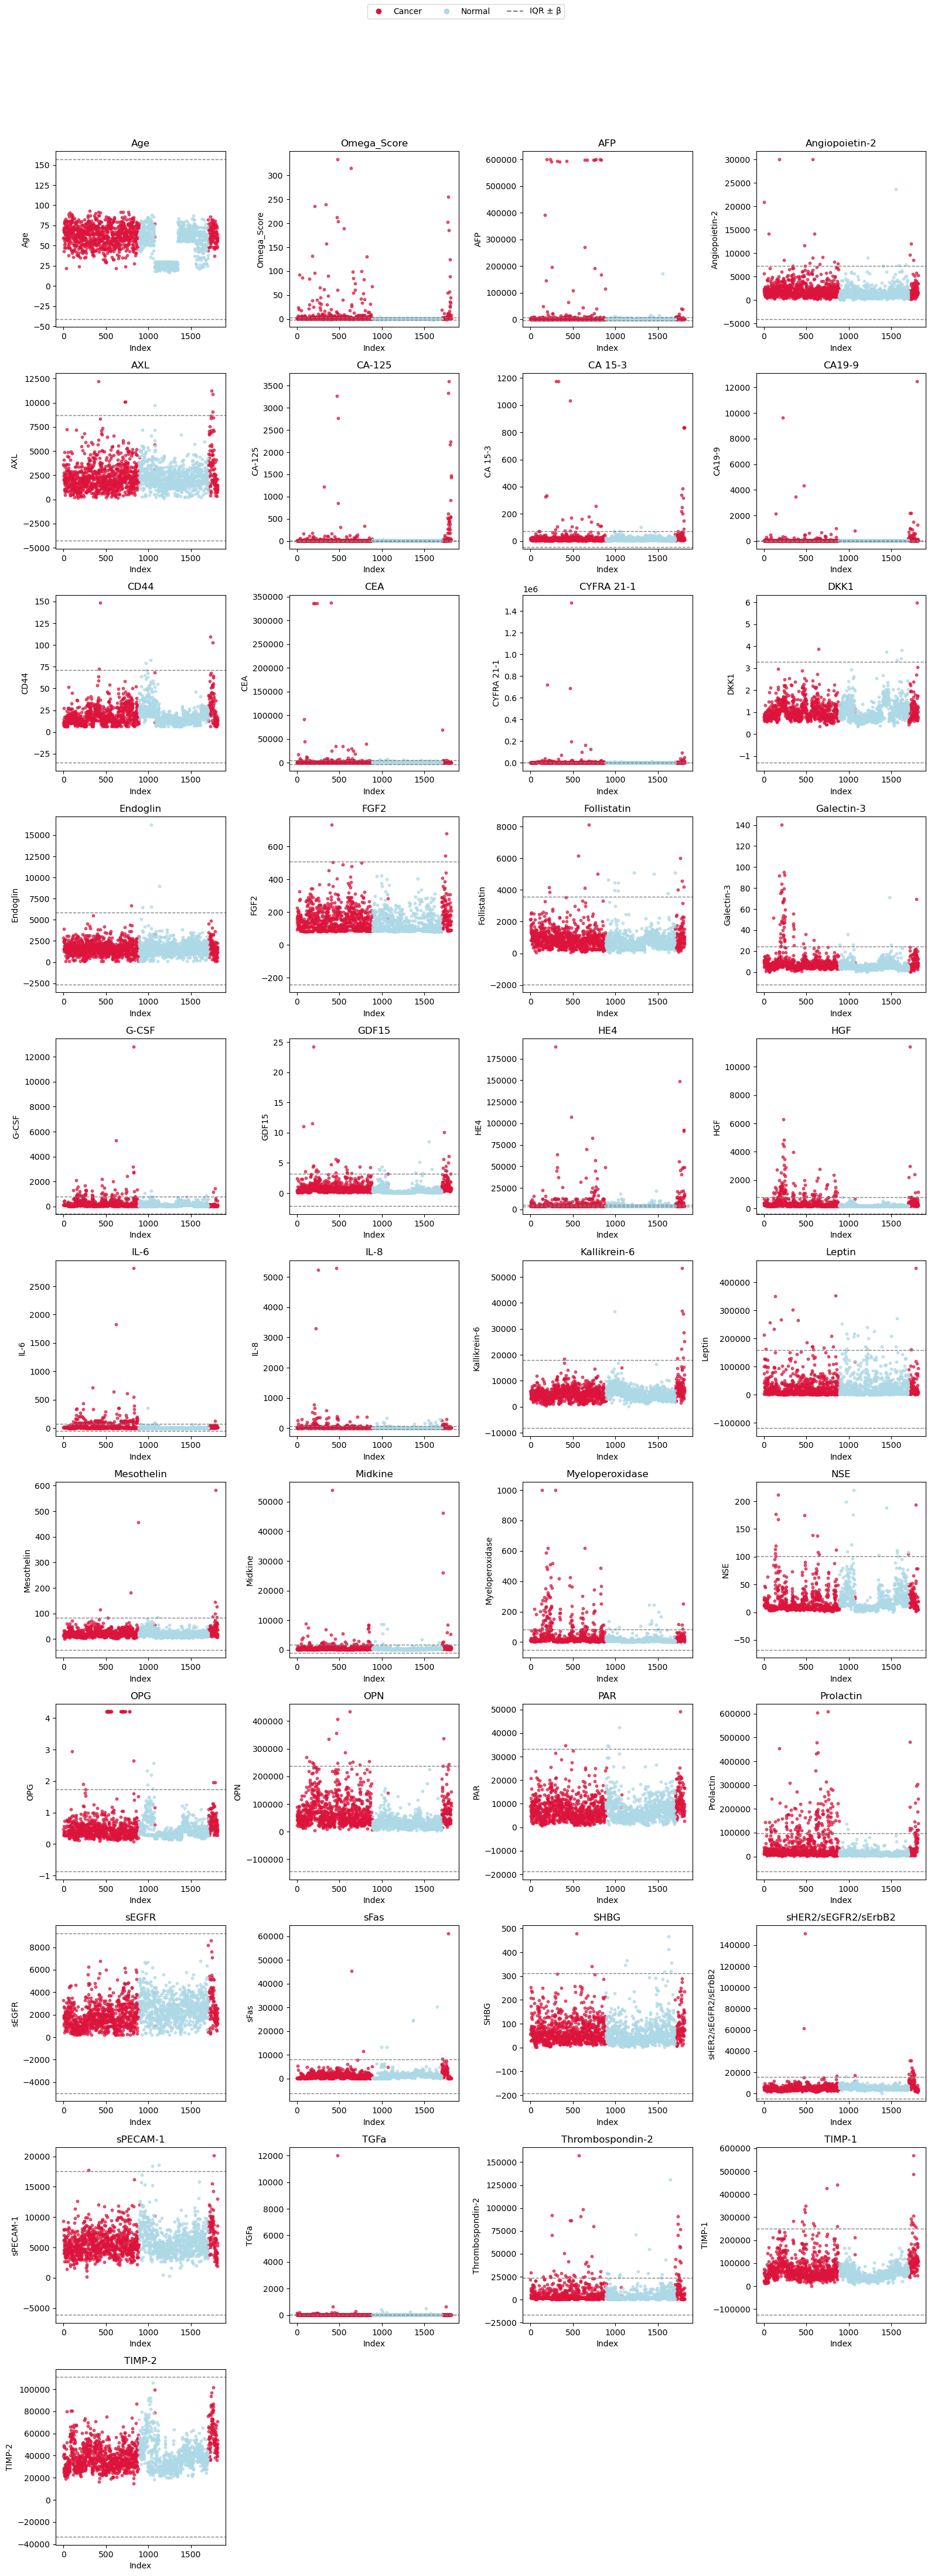

In [42]:
beta = 4

# Features numéricas
features = numeric_data.select_dtypes(include=np.number).columns

n_features = len(features)
n_cols = 4
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))
axes = axes.flatten()

# Colores fijos
color_map = {
    "Cancer": "crimson",
    "Normal": "lightblue"
}

for i, feature in enumerate(features):
    ax = axes[i]

    # Scatter por clase usando el index compartido
    for label, color in color_map.items():
        idx = dataframe.index[dataframe["Label"] == label]
        ax.scatter(
            idx,
            numeric_data.loc[idx, feature],
            s=10,
            alpha=0.7,
            color=color,
            label=label if i == 0 else ""
        )

    # IQR
    Q1 = numeric_data[feature].quantile(0.25)
    Q3 = numeric_data[feature].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + beta * IQR
    lower = Q1 - beta * IQR

    ax.axhline(upper, color="gray", linestyle="--", linewidth=1)
    ax.axhline(lower, color="gray", linestyle="--", linewidth=1)

    ax.set_title(feature)
    ax.set_xlabel("Index")
    ax.set_ylabel(feature)

# Eliminar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Leyenda común
handles = [
    plt.Line2D([], [], marker='o', linestyle='', color='crimson', label='Cancer'),
    plt.Line2D([], [], marker='o', linestyle='', color='lightblue', label='Normal'),
    plt.Line2D([], [], linestyle='--', color='gray', label='IQR ± β')
]

fig.legend(handles=handles, loc="upper center", ncol=3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("visualization_outliers_multiplier4.png", format="png", dpi=300)
plt.show()

In [43]:
# Identificar las columnas categóricas y numéricas
#categorical_columns = df_filled.select_dtypes(include=['object', 'category']).columns
numeric_columns = df_filled.select_dtypes(include=['int64', 'float64']).columns

# Crear un diccionario para almacenar resultados
results = {}

# Calcular la mediana para cada característica numérica por cada valor del Label
for col in numeric_columns:
    results[col] = df_filled.groupby('Label')[col].median()

# Contar la frecuencia para características categóricas por cada valor del Label
#for col in categorical_columns:
#    results[col] = df_filled.groupby('Label')[col].value_counts()

# Convertir el diccionario de resultados en un DataFrame para visualizar los resultados
result_table = pd.DataFrame.from_dict(results, orient='index')

# Mostrar la tabla resultante
print(result_table)

                        Cancer     Normal
Age                     64.000     55.000
Omega_Score              1.130      0.835
AFP                    999.432    895.128
Angiopoietin-2        1709.620   1267.560
AXL                   2104.920   2152.100
CA-125                   5.070      4.962
CA 15-3                 12.900     11.465
CA19-9                  16.692     16.398
CD44                    16.550     16.900
CEA                    482.600    707.910
CYFRA 21-1            1988.196   1994.874
DKK1                     0.950      0.930
Endoglin              1588.480   1607.310
FGF2                   132.320    102.900
Follistatin            833.260    685.185
Galectin-3               6.560      5.045
G-CSF                  119.310    109.470
GDF15                    0.640      0.260
HE4                   4092.972   4056.792
HGF                    252.040    165.462
IL-6                    12.040      3.660
IL-8                    14.340      8.178
Kallikrein-6          4886.500   4

In [45]:
df_filled.to_csv("df_cleaned.csv",index = False)